# K-Means Clustering on Cars Dataset using Seaborn Visualization.

# About the dataset :

Dataset has 8 parameters, check description of each parameter below:-

1.mpg - Miles Per Gallon in common words it represents the fuel per mile or we say mileage. usually lesser power vechicle have more mileage compare to higher ones.

2.cylinders - Cylinders is internal part of engine which give the accelaration power , more the number of cylinders, more capacity to go faster.  

3.cubicinches - Displacement is the size of the engine internally, measured in cubic inches (on American engines anwyay), and in CC's (cubic centemeters) on small import engines, or in liters on larger import engines. A 350 engine means it "displaces" 350 cubic inches of "area" internally that can be filled with fuel and air.

4.hp - horsepower commonly used term it specify the engine capacity. it is also called torque which means power needed to move your vechicle from 1 place to other.

5.weightlbs - It represents weight of a car.

6.time-to-60 - This parameter tells that how much second a car take to reach 60 miles or 100 km/hr speed.

7.year -  Which year car has been launched. 

8.brand - Barnd represent the owner country, which has designed this car in ours (US, Europe and Japan )

In [1]:
#import important library such as pandas, seaborn, sklearn etc.

import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
#import data from csv to dataframe using pandas..
df = pd.read_csv('cars.csv')

#as if you see dataframe, column name contain spaces on left side for convenience removing it... 
df.columns = df.columns.str.replace(' ', '')

In [3]:
# in data there is 3 brand US, Europe and Japan as categorical variable,
# converting categorical variable to numerical variable....

le = LabelEncoder().fit(df['brand'])
df['brand'] = le.transform(df['brand'])


#we have certain blank spaces value which needed to remove at start..
df = df.loc[df.cubicinches != ' ']
df = df.loc[df.weightlbs != ' ']


# both column have object type lets convert it to integer type.
df[['cubicinches', 'weightlbs']] = df[['cubicinches', 'weightlbs']].astype(int)

In [4]:
# as we have converted brand into numerical value for refrence vcalue mapping.
L = list(le.inverse_transform(df['brand']))
d = dict(zip(le.classes_, le.transform(le.classes_)))
print (d)

{' Europe.': 0, ' Japan.': 1, ' US.': 2}


In [5]:
#check info of data..
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 0 to 260
Data columns (total 8 columns):
mpg            256 non-null float64
cylinders      256 non-null int64
cubicinches    256 non-null int64
hp             256 non-null int64
weightlbs      256 non-null int64
time-to-60     256 non-null int64
year           256 non-null int64
brand          256 non-null int64
dtypes: float64(1), int64(7)
memory usage: 18.0 KB


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


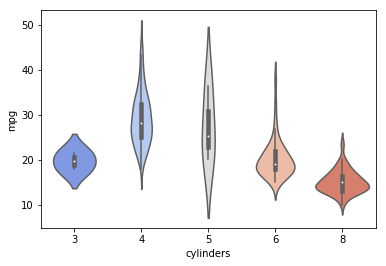

In [6]:
sns.violinplot('cylinders','mpg',data=df,palette='coolwarm')

The above graph shows distribution of data on cylinders and mpg. we see 4 and 5 cylinders car have some of higher mean making distribution non-normalized where as 8 cyclinder car have normal distribution.

as you notice lesser the cylinder more the mpg because lesser power engine which consume less fuel.

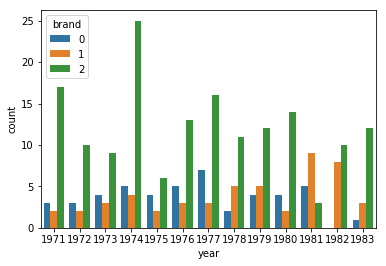

In [7]:
sns.countplot(x='year',hue='brand',data=df)

Above graph shows US and Japan have produced more number of car, year 74 and 77 have higher number of vechicle produced.

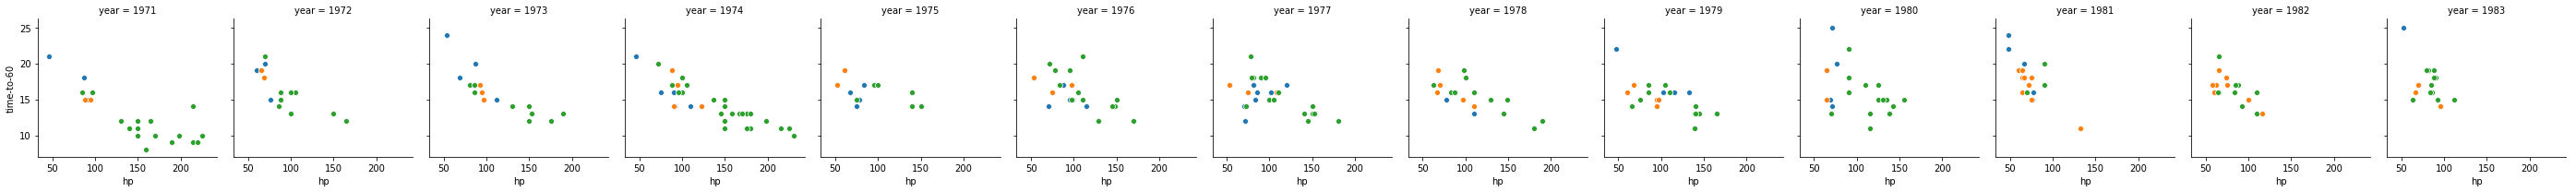

In [8]:
g = sns.FacetGrid(col='year',hue='brand',data=df,legend_out=False)
g.map(sns.scatterplot,'hp','time-to-60')

The above graph's tells that more the horespower lesser time it will take to reach 100km/hr speed and lesser power will take more time. 

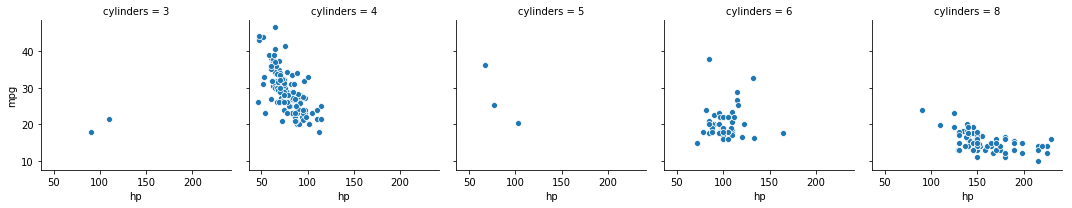

In [9]:
g = sns.FacetGrid(col='cylinders',data=df,legend_out=False)
g.map(sns.scatterplot,'hp','mpg')

Above graphs showcasing that usually 4 cyclinder cars have 50-100 hp engine and 8 cylinders have 150-200. now more the HP it will have less mpg value because it will consume more fuel. where as lesser power more mpg value.

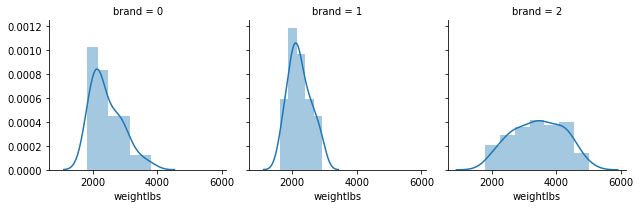

In [10]:
g = sns.FacetGrid(col='brand',data=df,legend_out=False)
g.map(sns.distplot,'weightlbs')

In above graph you can see Europe and Japan produced less weight cars where as US have uniform in all segments.

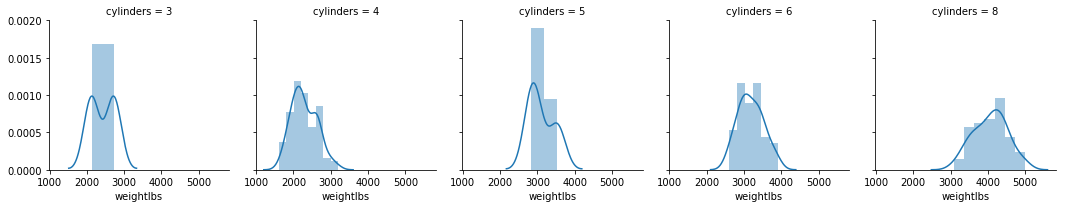

In [11]:
g = sns.FacetGrid(col='cylinders',data=df,legend_out=False)
g.map(sns.distplot,'weightlbs')

Based on cylinders , car weight has changes. if car has 4 cylinder then weight likely to be arounf 2000-3000 where as if 8 cylinders then weight will be doubled up.

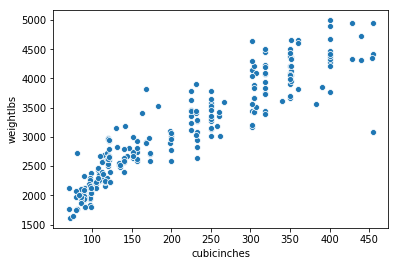

In [12]:
sns.scatterplot(df.cubicinches,df.weightlbs)

When Cube in inches increase in engine, means if more capacity engine and more number of cylinders then weights will be more.

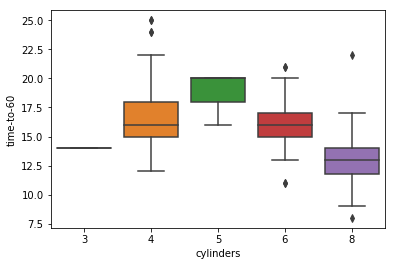

In [13]:
sns.boxplot('cylinders','time-to-60',data=df)

if less number of cylinders then it will take more time to reach 100km/hr. If more number of cylinders then it will take less time to reach 100km/hr speed like (bugati,lemborgini)

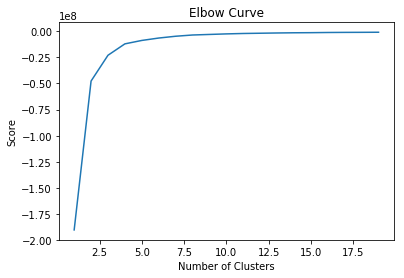

In [14]:
# get right number of cluster for K-means so we neeed to loop from 1 to 20 number of cluster and check score.
#Elbow method is used to represnt that. 
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

As we see 3 is optimal number of cluster where score has become constant. so fit and check cluster on 3 class cluster.

In [15]:
#fitting data in Kmeans theorem.
kmeans = KMeans(n_clusters=3, random_state=0).fit(df)

In [16]:
# this creates a new column called cluster which has cluster number for each row respectively.
df['cluster'] = kmeans.labels_

In [17]:
df.loc[df.cluster == 0].count()

mpg            118
cylinders      118
cubicinches    118
hp             118
weightlbs      118
time-to-60     118
year           118
brand          118
cluster        118
dtype: int64

You can see algorithm divides cluster based on low mpg, mediun and high mpg in below graph.

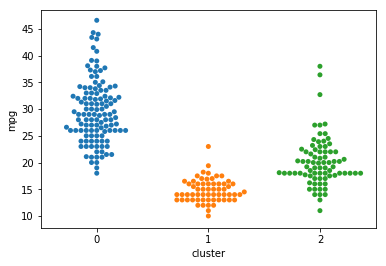

In [18]:
sns.swarmplot(df.cluster,df.mpg)

cluser 1 and cluster 2 represnt less cylinder vechicle like 4 and 6 where cluster 3 has 8 cylinder vechicle.

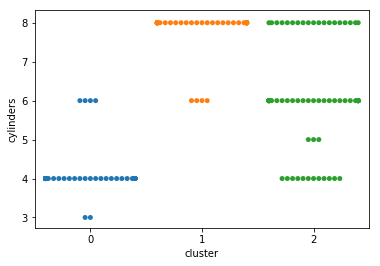

In [19]:
sns.swarmplot(df.cluster,df.cylinders)

Cluster 0 has low weight , cluster1 has medium and cluster 3 has high weight vechicle

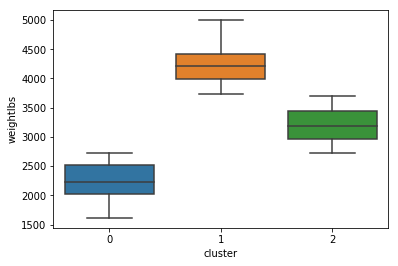

In [20]:
sns.boxplot(df.cluster,df.weightlbs)

Cluster 0 has less hp , cluster 1 has medium hp and cluster 2 has more number of HP.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


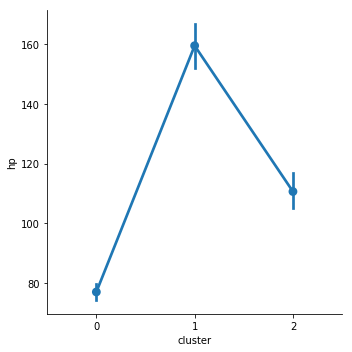

In [21]:
sns.factorplot('cluster','hp',data=df)

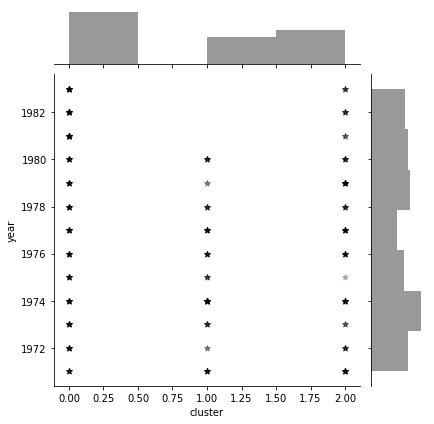

In [22]:
sns.jointplot(x='cluster', y='year', data=df, alpha=.25,
              color='k', marker='*')

More cubicinches belong to cluster 2 and then lesser one belongs to 1 and 0 respectively.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


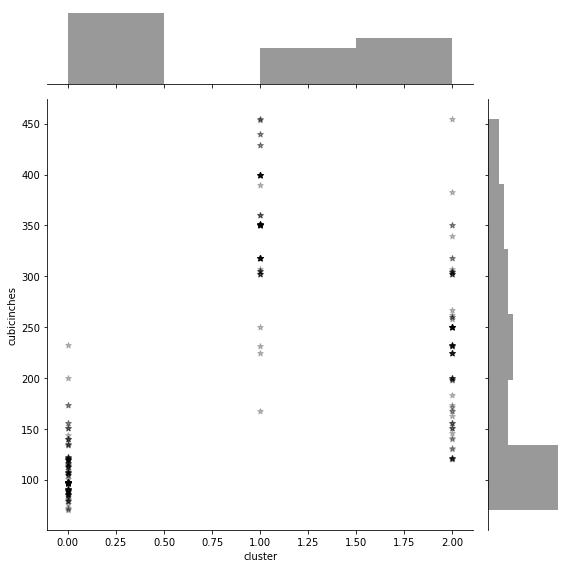

In [23]:
sns.jointplot(x='cluster', y='cubicinches', data=df, size=8, alpha=.25,
              color='k', marker='*')

Cluster 0 take more time to reach 100km/hr then cluseter 1 where as cluster 2 reach in very short span of time.

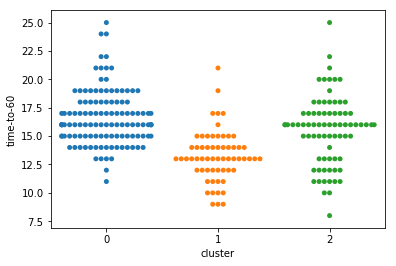

In [24]:
sns.swarmplot(df.cluster,df['time-to-60'])

Brand wise Japan and Europe are mixed in cluster 0 where as cluster 2 belong to US.

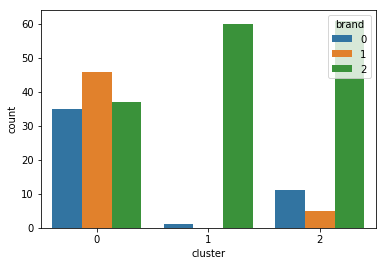

In [25]:
sns.countplot(x='cluster',hue='brand',data=df)

After all this analysis over many variables we see cluster divides based on hp, mpg, cylinders and time-to-60.

cluster 0 contain small weight , less cylinder, less hp, more time to 100km/hr and more mpg.

Cluster 1 contain slight weight more than cluseter1 , medium hp, medium cylinder *6, avg time to 100 km/hr and avg mileage.

cluster 2 contain max weight vechicle, max cylinders , max hp, less time to 100 km/hr and less mpg.

# Any feedback and update is always appreciated. If it helps please thumb's up which will confident me.